In [1]:
%matplotlib inline 
import neurolab as nl
import numpy as np

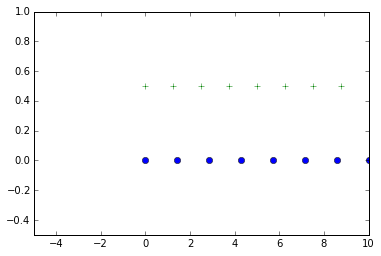

In [7]:
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)
x1 = np.linspace(0,10,N)
x2 = np.linspace(0,10,N,endpoint = False)
plt.plot(x1,y,'o')
plt.plot(x2, y+0.5, '+')
plt.ylim([-0.5,1])
plt.xlim([-5,10])
plt.show()

In [8]:
x = np.linspace(-7,7,20)
y = np.sin(x) * 0.5

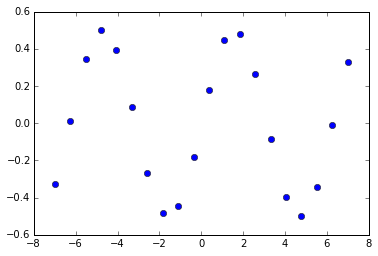

In [9]:
plt.plot(x,y,'o')

In [10]:
size = len(x)

In [15]:
inp = x.reshape(size,1)
tar =  y.reshape(size,1)

In [17]:
net = nl.net.newff([[-7,7]], [5,1])

In [18]:
help(nl.net.newff)

Help on function newff in module neurolab.net:

newff(minmax, size, transf=None)
    Create multilayer perceptron
    
    :Parameters:
        minmax: list of list, the outer list is the number of input neurons, 
                        inner lists must contain 2 elements: min and max
            Range of input value
        size: the length of list equal to the number of layers except input layer, 
                        the element of the list is the neuron number for corresponding layer
            Contains the number of neurons for each layer
        transf: list (default TanSig)
            List of activation function for each layer
    :Returns:
        net: Net
    :Example:
        >>> # create neural net with 2 inputs
                >>> # input range for each input is [-0.5, 0.5]
                >>> # 3 neurons for hidden layer, 1 neuron for output
                >>> # 2 layers including hidden layer and output layer
        >>> net = newff([[-0.5, 0.5], [-0.5, 0.5]], [3, 

In [21]:
dir(net)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ci',
 'co',
 'connect',
 'copy',
 'errorf',
 'init',
 'inp',
 'inp_minmax',
 'layers',
 'out',
 'out_minmax',
 'reset',
 'save',
 'sim',
 'step',
 'train',
 'trainf']

In [32]:
error = net.train(inp, tar, epochs = 500, show = 100, goal = 0.02)
out = net.sim(inp)

The goal of learning is reached


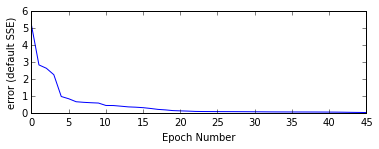

In [25]:
import pylab as pl
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch Number')
pl.ylabel('error (default SSE)')

In [30]:
x2 = np.linspace(-6.0, 6.0, 150)
y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)

In [33]:
y3 = out.reshape(size)

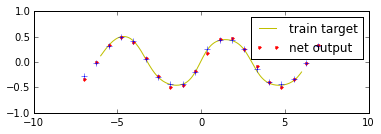

In [39]:
pl.subplot(212)
pl.plot(x2,y2,'y-', x,y,'r.', x,y3,'+')
pl.legend(['train target', 'net output'])
pl.xlim([-10,10])
pl.ylim([-1,1])
pl.show()

In [40]:
# Now let's start with our biological response problem
from numpy import genfromtxt, savetxt

In [41]:
#read in  data, parse into training and target sets
dataset = np.genfromtxt(open('../train.csv','r'), delimiter=',', dtype='f8')[1:]    
target = np.array([x[0] for x in dataset])
train = np.array([x[1:] for x in dataset])

In [86]:
# first let us set the input ranges
inpRange = [0,1]
noOfHiddenUnits = 4

# Initialising the neural net
bionet = nl.net.newff([inpRange for i in range(1, train.shape[1]+1)], [noOfHiddenUnits, 1])

In [87]:
# Train Network
error = bionet.train(train , target.reshape(target.shape[0],1), epochs = 100, show = 1, goal = 0.02)

Epoch: 1; Error: 746.631305126;
Epoch: 2; Error: 530.232233131;
Epoch: 3; Error: 511.662274719;
Epoch: 4; Error: 488.375004313;
Epoch: 5; Error: 473.541196099;
Epoch: 6; Error: 467.308057175;
Epoch: 7; Error: 461.354096512;
Epoch: 8; Error: 457.881976914;
Epoch: 9; Error: 451.050877012;
Epoch: 10; Error: 450.431232663;
Epoch: 11; Error: 447.101984874;
Epoch: 12; Error: 441.965032313;
Epoch: 13; Error: 433.58320312;
Epoch: 14; Error: 419.784099751;
Epoch: 15; Error: 412.415245872;
Epoch: 16; Error: 403.668302126;
Epoch: 17; Error: 390.31660447;
Epoch: 18; Error: 371.310686303;
Epoch: 19; Error: 360.229980756;
Epoch: 20; Error: 347.926881083;
Epoch: 21; Error: 342.210391488;
Epoch: 22; Error: 334.470486669;
Epoch: 23; Error: 327.453590022;
Epoch: 24; Error: 321.653333365;
Epoch: 25; Error: 315.46914555;
Epoch: 26; Error: 309.749559651;
Epoch: 27; Error: 306.876230227;
Epoch: 28; Error: 302.924775342;
Epoch: 29; Error: 297.465820664;
Epoch: 30; Error: 291.374847;
Epoch: 31; Error: 287.191

In [80]:
a = [1,2]
b = [a for i in range(1,10)]
#print b
train.shape[0]
len([inpRange for i in range(1, target.shape[0]+1)])
bionet.ci
train.shape
target.reshape(3751,1).shape
train.shape

(3751, 1776)

In [88]:
# Reading the test set
test = genfromtxt(open('../test.csv','r'), delimiter=',', dtype='f8')[1:]

In [100]:
out = bionet.sim(test)

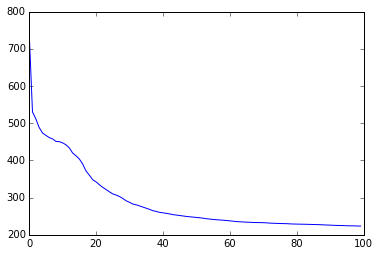

In [91]:
pl.plot(error)

In [101]:
out = out.reshape(out.shape[0])

In [104]:
out = out.tolist()

In [105]:
# Predicting the output
predicted_probs = [[index + 1, x] for index, x in enumerate(out)]

In [106]:
# saving the output
savetxt('submission.csv', predicted_probs, delimiter=',', fmt='%d,%f',
       header = 'MoleculeId,PredictedProbability', comments = '')